# classification-exercise

☞ HW4.csv 파일은 은행 마케팅 데이터로서, 은행 고객의 정보(age, job, marital, education, default, balance, housing, load)와 캠페인(정기예금 유치 마케팅)과 관련된 정보(contact, day, month, duration, campaign, pdays, previous, poutcome), 그리고 마
지막으로 정기예금 유치결과(y)를 저장하고 있다. y를 레이블로 하는 분류 문제에 대하여 아래의 순서로 분석을 실행하시오. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1) 파일을 읽어 데이터프레임을 생성한 후, 분석에 적절하지 않은 day와 month 칼럼은 삭제하시오. 수치형 특성의 이름과 범주형 특성의 이름의 리스트를 출력하시오.

In [9]:
# 출력
df = pd.read_csv('HW4.csv', delimiter=';').drop(['day', 'month'], axis = 1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,226,1,-1,0,unknown,no


In [43]:
col= df.columns[:-1]
col

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome'],
      dtype='object')

In [44]:
# 수치형 특성
num_col = [i for i in col if df.dtypes[i] != 'O']
num_col

['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

In [45]:
# 범주형 특성
o_col = [i for i in col if df.dtypes[i] == 'O']
o_col

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'poutcome']

## 2) 레이블의 범주별 비율을 구하시오.

In [53]:
yn = df.iloc[:,-1].value_counts()
yn

no     4000
yes     521
Name: y, dtype: int64

In [59]:
# yes
yn.yes/(yn.yes + yn.no)

0.11523999115239991

In [60]:
# no
yn.no/(yn.yes + yn.no)

0.8847600088476001

## 3) 수치형 특성의 요약통계(평균, 표준편차 등)와 범주형 특성의 막대 그래프를 구하시오.

In [64]:
num_df = df[num_col]
num_df.head(2)

,age,balance,duration,campaign,pdays,previous
0,30,1787,79,1,-1,0
1,33,4789,220,1,339,4


In [65]:
# 수치형 특성의 요약 통계
num_df.describe()

,age,balance,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,3025.000000,50.000000,871.000000,25.000000


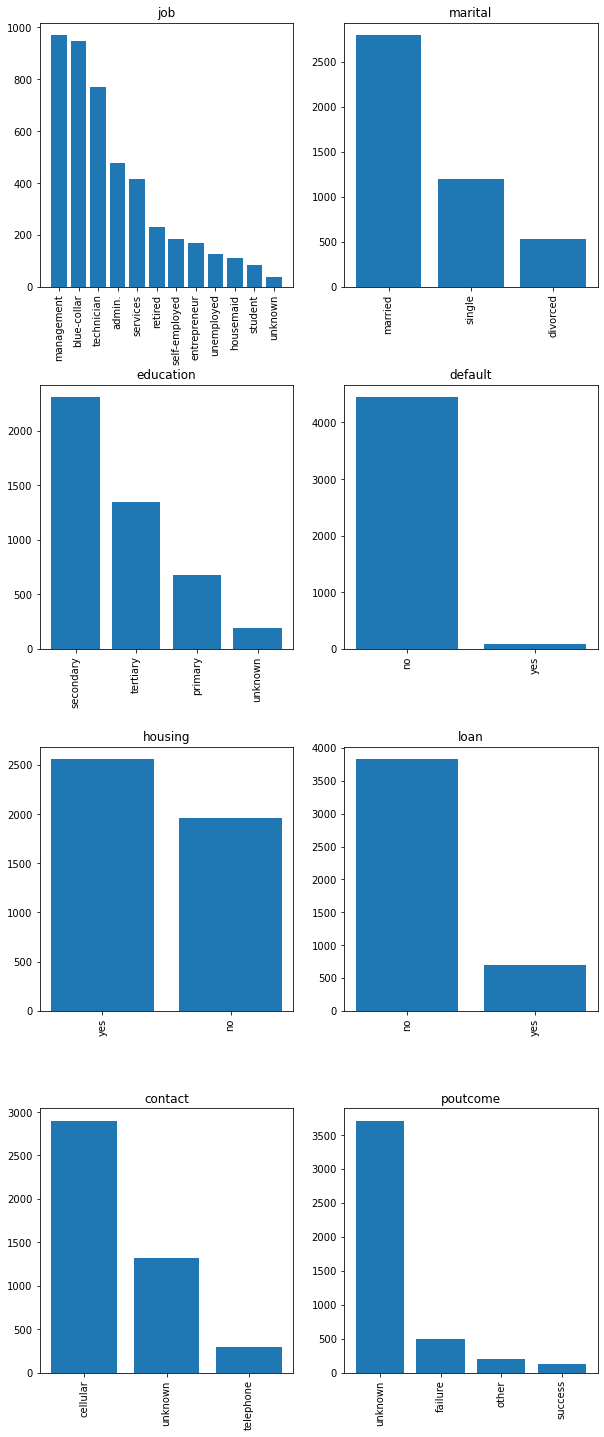

In [117]:
# 범주형 특성의 막대 그래프
page = 1
plt.figure(figsize = (10, 10),)
plt.subplots_adjust(top = 2, hspace=0.37)

for i in range(len(o_col)):
    temp = df[o_col[i]].value_counts()
    plt.subplot(4, 2, page)
    plt.title(o_col[i])
    plt.xticks(rotation = 90)
    plt.bar(temp.index, temp.values)
    page += 1

## 4) 특성행렬을 만든 후 범주형 특성은 원-핫-인코딩한 데이터프레임(4521rows×38columns)을 구하시오. 그리고 레이블에 대하여 'yes'는 0으로 'no'는 1로 인코딩하시오. 

In [122]:
# X
X = df.iloc[:, :-1]
X.shape

(4521, 14)

In [154]:
# one-hot-encoding
X = pd.get_dummies(X)
X

,age,balance,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,79,1,-1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
1,33,4789,220,1,339,4,0,0,0,0,...,1,0,1,1,0,0,1,0,0,0
2,35,1350,185,1,330,1,0,0,0,0,...,1,1,0,1,0,0,1,0,0,0
3,30,1476,199,4,-1,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
4,59,0,226,1,-1,0,0,1,0,0,...,1,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,329,5,-1,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,1
4517,57,-3313,153,1,-1,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
4518,57,295,151,11,-1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
4519,28,1137,129,4,211,3,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0


In [144]:
# y
y = df.y
y = np.where(y == 'yes', 0, 1)
y

array([1, 1, 1, ..., 1, 1, 1])

## 5) 데이터를 훈련용과 테스트용으로 8:2로 분할한 후, 표준화하시오.

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [164]:
# 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y)

In [158]:
# 표준화
sc = StandardScaler()
sc = sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## 6) cross_val_score 함수(cv=5)를 사용하여 로지스틱 회귀의 초모수 C의 값을 [0.01, 0.1, 1, 10, 100]로 바꾸어 가며 최적값을 구한 후, 이 값을 사용한 테스트 스코어를 구하시오. 테스트 데이터에 대한 정오분류표를 작성하고 정기예금에 가입하지 않은 고객의 정밀도와 재현율을 구한 후 그 의미를 기술하시오. 

In [159]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [183]:
C = [0.01, 0.1, 1, 10, 100]
best = 0

for i in range(len(C)):
    scores = cross_val_score(estimator = LogisticRegression(C = C[i]),
                        X = X_train_std, y = y_train,
                             cv = 5, n_jobs = -1)
    s_mean = np.mean(scores)
    print(C[i], s_mean)
    
    if best < s_mean:
        best = s_mean
        best_param = {'C' : C[i]}
        

0.01 0.884679397537883
0.1 0.884679397537883
1 0.884679397537883
10 0.884679397537883
100 0.884679397537883


In [184]:
# 테스트 스코어
logistic = LogisticRegression(**best_param)
logistic.fit(X_train_std, y_train)

logistic.score(X_test_std, y_test)

0.8850828729281768

In [185]:
# 정오분류표
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, logistic.predict(X_test_std))

array([[  0, 104],
       [  0, 801]], dtype=int64)

- array[0, 0] : 0으로 예측했고, 실제로도 0인 값 $TN$
- array[0, 1] : 1로 예측했는데, 실제로는 0인 값 $FP$
- array[1, 0] : 0으로 예측했고, 실제로는 1인 값 $FN$
- array[1, 1] : 1으로 예측했고, 실제로도 1인 값 $TP$

#### 정밀도
- $precision = \frac{TP}{TP + FP} = \frac{801}{905} = 0.885$  

> 예측모델이 가입하지 않을 것 같다고 예측하고, 실제로도 가입하지 않았는지에 대한 지표를 보여주는 정밀도(결과의 질)는 0.885이다.

#### 재현율
- $precision = \frac{TP}{TP + FN} = \frac{801}{801} = 1$  

> 실제 가입하지 않은 고객들 중에서 모델이 가입하지 않을 것 같다고 예측한 지표인 재현율(결과의 완벽성)은 1이다. 

#### 정밀도, 재현율 두 지표 다 높은 결과를 보이므로 바람직하다고 볼 수 있다.

## 7) GridSearchCV(cv=5)를 사용하여 결정트리의 최적 최대 깊이(1~10)를 구하고, 이 값을 사용한 테스트 스코어를 구하시오.

In [191]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [202]:
# 결정트리 최대 깊이
param_grid = {'max_depth' : range(1, 11)}

gs = GridSearchCV(estimator = DecisionTreeClassifier(),
             param_grid = param_grid, cv = 5, n_jobs = -1, 
             scoring = 'accuracy')
gs.fit(X_train_std, y_train)
gs.best_score_, gs.best_params_

(0.8844027723649923, {'max_depth': 1})

In [206]:
# 테스트 스코어
tree = DecisionTreeClassifier(max_depth = 1)
tree.fit(X_train_std, y_train)
tree.score(X_test_std, y_test)

0.8850828729281768

## 8) StandardScaler, PCA(n_componetns=5), SVC(kernel='rbf')를 순서대로 연결한 파이프라인을 생성한 후, C와 gamma의 값들을 [0.01, 0.1, 1, 10, 100]으로 바꾸면서GridSearchCV(cv=5)를 사용하여 최적 C와 gamma를 구하시오. 이 모형의 테스트 스코어는 얼마인가?

In [215]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

pipeline = make_pipeline(StandardScaler(),
                         PCA(n_components = 5),
                         SVC(kernel = 'rbf'))

cv = [0.01, 0.1, 1, 10, 100]
param_grid = {'svc__C' : cv, 'svc__gamma' : cv}
gs = GridSearchCV(estimator = pipeline, param_grid = param_grid, 
                  cv = 5, n_jobs = -1, scoring = 'accuracy')
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('pca', PCA(n_components=5)),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'svc__C': [0.01, 0.1, 1, 10, 100],
                         'svc__gamma': [0.01, 0.1, 1, 10, 100]},
             scoring='accuracy')

In [218]:
# 최적 C와 gamma
gs.best_params_, gs.best_score_

({'svc__C': 10, 'svc__gamma': 0.1}, 0.8885517678793853)

In [219]:
# 테스트 스코어
gs.score(X_test, y_test)

0.8839779005524862